In [1]:
# Import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library based on matplotlib
from IPython.display import display # Manage multiple output per cell
import datetime
import sqlite3

In [2]:
# Import sickit methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, roc_auc_score
from sklearn.calibration import calibration_curve

In [3]:
# Import model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Import and define deep learning model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
def create_DNN_model(optimizer,nb_feature):
    model = Sequential()
    model.add(Dense(nb_feature, input_dim=nb_feature, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model
def create_DNN_model_adam_all():
    return create_DNN_model('adam',184)
def create_DNN_model_adam_38():
    return create_DNN_model('adam',38)
def create_DNN_model_sgd_all():
    return create_DNN_model('SGD',184)
def create_DNN_model_sgd_56():
    return create_DNN_model('SGD',56)

Using TensorFlow backend.


In [5]:
# Define target
target = 'INFO_FTR_H'

In [6]:
# Define all different features dataset
raw_features = ["A_MEANS_FIVE_AC","A_MEANS_FIVE_AF","A_MEANS_FIVE_AR","A_MEANS_FIVE_AS","A_MEANS_FIVE_AST","A_MEANS_FIVE_AY","A_MEANS_FIVE_FTAG","A_MEANS_FIVE_FTHG","A_MEANS_FIVE_FTR_A","A_MEANS_FIVE_FTR_D","A_MEANS_FIVE_FTR_H","A_MEANS_FIVE_HC","A_MEANS_FIVE_HF","A_MEANS_FIVE_HR","A_MEANS_FIVE_HS","A_MEANS_FIVE_HST","A_MEANS_FIVE_HTAG","A_MEANS_FIVE_HTHG","A_MEANS_FIVE_HTR_A","A_MEANS_FIVE_HTR_D","A_MEANS_FIVE_HTR_H","A_MEANS_FIVE_HY","H_MEANS_FIVE_AC","H_MEANS_FIVE_AF","H_MEANS_FIVE_AR","H_MEANS_FIVE_AS","H_MEANS_FIVE_AST","H_MEANS_FIVE_AY","H_MEANS_FIVE_FTAG","H_MEANS_FIVE_FTHG","H_MEANS_FIVE_FTR_A","H_MEANS_FIVE_FTR_D","H_MEANS_FIVE_FTR_H","H_MEANS_FIVE_HC","H_MEANS_FIVE_HF","H_MEANS_FIVE_HR","H_MEANS_FIVE_HS","H_MEANS_FIVE_HST","H_MEANS_FIVE_HTAG","H_MEANS_FIVE_HTHG","H_MEANS_FIVE_HTR_A","H_MEANS_FIVE_HTR_D","H_MEANS_FIVE_HTR_H","H_MEANS_FIVE_HY","A_MEANS_THREE_AC","A_MEANS_THREE_AF","A_MEANS_THREE_AR","A_MEANS_THREE_AS","A_MEANS_THREE_AST","A_MEANS_THREE_AY","A_MEANS_THREE_FTAG","A_MEANS_THREE_FTHG","A_MEANS_THREE_FTR_A","A_MEANS_THREE_FTR_D","A_MEANS_THREE_FTR_H","A_MEANS_THREE_HC","A_MEANS_THREE_HF","A_MEANS_THREE_HR","A_MEANS_THREE_HS","A_MEANS_THREE_HST","A_MEANS_THREE_HTAG","A_MEANS_THREE_HTHG","A_MEANS_THREE_HTR_A","A_MEANS_THREE_HTR_D","A_MEANS_THREE_HTR_H","A_MEANS_THREE_HY","H_MEANS_THREE_AC","H_MEANS_THREE_AF","H_MEANS_THREE_AR","H_MEANS_THREE_AS","H_MEANS_THREE_AST","H_MEANS_THREE_AY","H_MEANS_THREE_FTAG","H_MEANS_THREE_FTHG","H_MEANS_THREE_FTR_A","H_MEANS_THREE_FTR_D","H_MEANS_THREE_FTR_H","H_MEANS_THREE_HC","H_MEANS_THREE_HF","H_MEANS_THREE_HR","H_MEANS_THREE_HS","H_MEANS_THREE_HST","H_MEANS_THREE_HTAG","H_MEANS_THREE_HTHG","H_MEANS_THREE_HTR_A","H_MEANS_THREE_HTR_D","H_MEANS_THREE_HTR_H","H_MEANS_THREE_HY","A_STD_FIVE_AC","A_STD_FIVE_AF","A_STD_FIVE_AR","A_STD_FIVE_AS","A_STD_FIVE_AST","A_STD_FIVE_AY","A_STD_FIVE_FTAG","A_STD_FIVE_FTHG","A_STD_FIVE_FTR_A","A_STD_FIVE_FTR_D","A_STD_FIVE_FTR_H","A_STD_FIVE_HC","A_STD_FIVE_HF","A_STD_FIVE_HR","A_STD_FIVE_HS","A_STD_FIVE_HST","A_STD_FIVE_HTAG","A_STD_FIVE_HTHG","A_STD_FIVE_HTR_A","A_STD_FIVE_HTR_D","A_STD_FIVE_HTR_H","A_STD_FIVE_HY","H_STD_FIVE_AC","H_STD_FIVE_AF","H_STD_FIVE_AR","H_STD_FIVE_AS","H_STD_FIVE_AST","H_STD_FIVE_AY","H_STD_FIVE_FTAG","H_STD_FIVE_FTHG","H_STD_FIVE_FTR_A","H_STD_FIVE_FTR_D","H_STD_FIVE_FTR_H","H_STD_FIVE_HC","H_STD_FIVE_HF","H_STD_FIVE_HR","H_STD_FIVE_HS","H_STD_FIVE_HST","H_STD_FIVE_HTAG","H_STD_FIVE_HTHG","H_STD_FIVE_HTR_A","H_STD_FIVE_HTR_D","H_STD_FIVE_HTR_H","H_STD_FIVE_HY","A_STD_THREE_AC","A_STD_THREE_AF","A_STD_THREE_AR","A_STD_THREE_AS","A_STD_THREE_AST","A_STD_THREE_AY","A_STD_THREE_FTAG","A_STD_THREE_FTHG","A_STD_THREE_FTR_A","A_STD_THREE_FTR_D","A_STD_THREE_FTR_H","A_STD_THREE_HC","A_STD_THREE_HF","A_STD_THREE_HR","A_STD_THREE_HS","A_STD_THREE_HST","A_STD_THREE_HTAG","A_STD_THREE_HTHG","A_STD_THREE_HTR_A","A_STD_THREE_HTR_D","A_STD_THREE_HTR_H","A_STD_THREE_HY","H_STD_THREE_AC","H_STD_THREE_AF","H_STD_THREE_AR","H_STD_THREE_AS","H_STD_THREE_AST","H_STD_THREE_AY","H_STD_THREE_FTAG","H_STD_THREE_FTHG","H_STD_THREE_FTR_A","H_STD_THREE_FTR_D","H_STD_THREE_FTR_H","H_STD_THREE_HC","H_STD_THREE_HF","H_STD_THREE_HR","H_STD_THREE_HS","H_STD_THREE_HST","H_STD_THREE_HTAG","H_STD_THREE_HTHG","H_STD_THREE_HTR_A","H_STD_THREE_HTR_D","H_STD_THREE_HTR_H","H_STD_THREE_HY","INFO_Div"]
all_features = ['A_MEANS_FIVE_AC','A_MEANS_FIVE_AF','A_MEANS_FIVE_AR','A_MEANS_FIVE_AS','A_MEANS_FIVE_AST','A_MEANS_FIVE_AY','A_MEANS_FIVE_FTAG','A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_D','A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC','A_MEANS_FIVE_HF','A_MEANS_FIVE_HR','A_MEANS_FIVE_HS','A_MEANS_FIVE_HST','A_MEANS_FIVE_HTAG','A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A','A_MEANS_FIVE_HTR_D','A_MEANS_FIVE_HTR_H','A_MEANS_FIVE_HY','H_MEANS_FIVE_AC','H_MEANS_FIVE_AF','H_MEANS_FIVE_AR','H_MEANS_FIVE_AS','H_MEANS_FIVE_AST','H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_D','H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC','H_MEANS_FIVE_HF','H_MEANS_FIVE_HR','H_MEANS_FIVE_HS','H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTHG','H_MEANS_FIVE_HTR_A','H_MEANS_FIVE_HTR_D','H_MEANS_FIVE_HTR_H','H_MEANS_FIVE_HY','A_MEANS_THREE_AC','A_MEANS_THREE_AF','A_MEANS_THREE_AR','A_MEANS_THREE_AS','A_MEANS_THREE_AST','A_MEANS_THREE_AY','A_MEANS_THREE_FTAG','A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A','A_MEANS_THREE_FTR_D','A_MEANS_THREE_FTR_H','A_MEANS_THREE_HC','A_MEANS_THREE_HF','A_MEANS_THREE_HR','A_MEANS_THREE_HS','A_MEANS_THREE_HST','A_MEANS_THREE_HTAG','A_MEANS_THREE_HTHG','A_MEANS_THREE_HTR_A','A_MEANS_THREE_HTR_D','A_MEANS_THREE_HTR_H','A_MEANS_THREE_HY','H_MEANS_THREE_AC','H_MEANS_THREE_AF','H_MEANS_THREE_AR','H_MEANS_THREE_AS','H_MEANS_THREE_AST','H_MEANS_THREE_AY','H_MEANS_THREE_FTAG','H_MEANS_THREE_FTHG','H_MEANS_THREE_FTR_A','H_MEANS_THREE_FTR_D','H_MEANS_THREE_FTR_H','H_MEANS_THREE_HC','H_MEANS_THREE_HF','H_MEANS_THREE_HR','H_MEANS_THREE_HS','H_MEANS_THREE_HST','H_MEANS_THREE_HTAG','H_MEANS_THREE_HTHG','H_MEANS_THREE_HTR_A','H_MEANS_THREE_HTR_D','H_MEANS_THREE_HTR_H','H_MEANS_THREE_HY','A_STD_FIVE_AC','A_STD_FIVE_AF','A_STD_FIVE_AR','A_STD_FIVE_AS','A_STD_FIVE_AST','A_STD_FIVE_AY','A_STD_FIVE_FTAG','A_STD_FIVE_FTHG','A_STD_FIVE_FTR_A','A_STD_FIVE_FTR_D','A_STD_FIVE_FTR_H','A_STD_FIVE_HC','A_STD_FIVE_HF','A_STD_FIVE_HR','A_STD_FIVE_HS','A_STD_FIVE_HST','A_STD_FIVE_HTAG','A_STD_FIVE_HTHG','A_STD_FIVE_HTR_A','A_STD_FIVE_HTR_D','A_STD_FIVE_HTR_H','A_STD_FIVE_HY','H_STD_FIVE_AC','H_STD_FIVE_AF','H_STD_FIVE_AR','H_STD_FIVE_AS','H_STD_FIVE_AST','H_STD_FIVE_AY','H_STD_FIVE_FTAG','H_STD_FIVE_FTHG','H_STD_FIVE_FTR_A','H_STD_FIVE_FTR_D','H_STD_FIVE_FTR_H','H_STD_FIVE_HC','H_STD_FIVE_HF','H_STD_FIVE_HR','H_STD_FIVE_HS','H_STD_FIVE_HST','H_STD_FIVE_HTAG','H_STD_FIVE_HTHG','H_STD_FIVE_HTR_A','H_STD_FIVE_HTR_D','H_STD_FIVE_HTR_H','H_STD_FIVE_HY','A_STD_THREE_AC','A_STD_THREE_AF','A_STD_THREE_AR','A_STD_THREE_AS','A_STD_THREE_AST','A_STD_THREE_AY','A_STD_THREE_FTAG','A_STD_THREE_FTHG','A_STD_THREE_FTR_A','A_STD_THREE_FTR_D','A_STD_THREE_FTR_H','A_STD_THREE_HC','A_STD_THREE_HF','A_STD_THREE_HR','A_STD_THREE_HS','A_STD_THREE_HST','A_STD_THREE_HTAG','A_STD_THREE_HTHG','A_STD_THREE_HTR_A','A_STD_THREE_HTR_D','A_STD_THREE_HTR_H','A_STD_THREE_HY','H_STD_THREE_AC','H_STD_THREE_AF','H_STD_THREE_AR','H_STD_THREE_AS','H_STD_THREE_AST','H_STD_THREE_AY','H_STD_THREE_FTAG','H_STD_THREE_FTHG','H_STD_THREE_FTR_A','H_STD_THREE_FTR_D','H_STD_THREE_FTR_H','H_STD_THREE_HC','H_STD_THREE_HF','H_STD_THREE_HR','H_STD_THREE_HS','H_STD_THREE_HST','H_STD_THREE_HTAG','H_STD_THREE_HTHG','H_STD_THREE_HTR_A','H_STD_THREE_HTR_D','H_STD_THREE_HTR_H','H_STD_THREE_HY','INFO_Div_D1','INFO_Div_E0','INFO_Div_E1','INFO_Div_E2','INFO_Div_F1','INFO_Div_I1','INFO_Div_SC0','INFO_Div_SP1']
best_features_DNN_adam_38 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTR_H','A_MEANS_THREE_AC', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','H_MEANS_THREE_HC', 'A_STD_FIVE_AST', 'A_STD_FIVE_HF','H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_HC', 'H_STD_FIVE_HF','H_STD_FIVE_HST']
best_features_DNN_SGD_56 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'A_MEANS_THREE_HST','H_MEANS_THREE_AC', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_XGBoost_60 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_AY', 'A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A', 'A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTHG', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HF', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG', 'H_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_HTR_H','A_MEANS_THREE_AC', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'A_MEANS_THREE_HST', 'H_MEANS_THREE_AC','H_MEANS_THREE_AS', 'H_MEANS_THREE_AST', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AS', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC','A_STD_FIVE_HF', 'A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS','H_STD_FIVE_AST', 'H_STD_FIVE_HC', 'H_STD_FIVE_HF','H_STD_FIVE_HST', 'H_STD_FIVE_HTHG', 'H_STD_THREE_AS','H_STD_THREE_HST']
best_features_SVM = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_RF = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AC', 'H_MEANS_THREE_AS','H_MEANS_THREE_FTHG', 'H_MEANS_THREE_HC', 'H_MEANS_THREE_HST','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_NB = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_MLP = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_LDA = ['A_MEANS_FIVE_AS', 'A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HS', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST']
best_features_KNN = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','A_MEANS_THREE_AS', 'A_MEANS_THREE_HS', 'A_STD_FIVE_HF']
best_features_ExraTree = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'A_MEANS_THREE_HST','H_MEANS_THREE_AC', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_ElasticNEt = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_HS', 'A_STD_FIVE_HF', 'H_STD_FIVE_HST']
best_features_bagging = ['A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST', 'A_MEANS_FIVE_FTAG','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','A_MEANS_THREE_HS']
best_features_AdaBoost = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC','A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS','H_MEANS_THREE_AS', 'H_MEANS_THREE_HC', 'A_STD_FIVE_AST','A_STD_FIVE_HF', 'H_STD_FIVE_AF', 'H_STD_FIVE_HC','H_STD_FIVE_HST']
best_features_LR = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HF', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG', 'H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC','A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_HC','A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF', 'A_STD_FIVE_HS','H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST', 'H_STD_FIVE_HC','H_STD_FIVE_HF', 'H_STD_FIVE_HST']
best_features_GB = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AC', 'H_MEANS_THREE_AS','H_MEANS_THREE_FTHG', 'H_MEANS_THREE_HC', 'H_MEANS_THREE_HST','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']

In [7]:
# Construct layer 1
# [Model_name, Preprocessing_needed, calibration, model_with_hyperparameter, feature_list]
layer_1 = [
    ['DNN_adam_all', True, 'sigmoid', KerasClassifier(build_fn=create_DNN_model_adam_all,verbose=0,batch_size=1500,epochs=3), all_features],
    ['DNN_adam_bf', True, 'isotonic', KerasClassifier(build_fn=create_DNN_model_adam_38,verbose=0,batch_size=1500,epochs=3), best_features_DNN_adam_38],
    ['DNN_sgd_all', True, 'sigmoid', KerasClassifier(build_fn=create_DNN_model_sgd_all,verbose=0,batch_size=80,epochs=5), all_features],
    ['DNN_sgd_bf', True, 'isotonic', KerasClassifier(build_fn=create_DNN_model_sgd_56,verbose=0,batch_size=80,epochs=5), best_features_DNN_SGD_56],
    ['XGBoost_all', False, 'sigmoid', XGBClassifier(learning_rate =0.01,n_estimators=572,max_depth=3,min_child_weight=5,gamma=0,subsample=0.9,colsample_bytree=0.9,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=15), all_features],
    ['XGBoost_bf', False, 'no', XGBClassifier(learning_rate =0.01,n_estimators=716,max_depth=3,min_child_weight=5,gamma=0,subsample=0.9,colsample_bytree=0.9,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=15), best_features_XGBoost_60],
    ['SVM', True, 'sigmoid', SVC(random_state=0,C=0.02,kernel='linear',gamma=1,probability=True), best_features_SVM],
    ['RF_all', False, 'isotonic', RandomForestClassifier(random_state=0, n_jobs=-1,criterion='entropy', max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=360), all_features],
    ['RF_bf', False, 'sigmoid', RandomForestClassifier(random_state=0, n_jobs=-1,criterion='entropy', max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=360), best_features_RF],
    ['NB', True, 'isotonic', GaussianNB(), best_features_NB],
    ['MLP', True, 'no', MLPClassifier(random_state=0,activation='identity', alpha=3, hidden_layer_sizes=(10,), max_iter=200, solver= 'adam'), best_features_MLP],
    ['LDA', True, 'no', LinearDiscriminantAnalysis(), best_features_LDA],
    ['KNN', True, 'sigmoid', KNeighborsClassifier(n_jobs=-1,n_neighbors=200, p=2, weights='uniform'), best_features_KNN],
    ['ExraTree', False, 'isotonic', ExtraTreesClassifier(random_state=0,n_jobs=-1,criterion='entropy',max_depth=30,max_features=None,min_samples_leaf=1,min_samples_split=16,n_estimators=350), best_features_ExraTree],
    ['ElasticNEt', True, 'isotonic', SGDClassifier(random_state=0,alpha=0.0024, l1_ratio=0.64, loss='log', penalty='elasticnet'), best_features_ElasticNEt],
    ['Bagging_max_sample', False, 'sigmoid', BaggingClassifier(random_state=0, n_jobs=-1,max_features=0.7, max_samples=1.0, n_estimators=100), all_features],
    ['Bagging_min_sample_all', False, 'isotonic', BaggingClassifier(random_state=0, n_jobs=-1,max_features=0.5, max_samples=0.1, n_estimators=400), all_features],
    ['Bagging_min_sample_bf', False, 'sigmoid', BaggingClassifier(random_state=0, n_jobs=-1,max_features=0.5, max_samples=0.1, n_estimators=400), best_features_bagging],
    ['AdaBoost', False, 'sigmoid', AdaBoostClassifier(random_state=0,n_estimators=30), best_features_AdaBoost],
    ['GB', False, 'isotonic', GradientBoostingClassifier(random_state=0,criterion='friedman_mse',loss='deviance',max_depth=20,max_features='log2',min_samples_leaf=3,min_samples_split=10,n_estimators=150), best_features_GB],
    ['LR', True, 'no', LogisticRegression(random_state=0,n_jobs=-1,solver='liblinear',C=0.008,penalty='l1'), best_features_LR]
]

In [8]:
# Import and Prepare dataset
# DB Sqlite connection
db = "/Users/thibaultclement/Project/ligue1-predict/src/notebook/data/db/soccer_predict.sqlite"
conn = sqlite3.connect(db)
cur = conn.cursor()
# Get all prematch data
df = pd.read_sql_query("SELECT * FROM pre_matchs ORDER BY INFO_Date ASC;", conn)
df = (df[df.columns.drop(['index'])])
# Remove all game between June (include) and October (include)
df['INFO_Date'] = pd.to_datetime(df['INFO_Date'])
df['INFO_Date'].dt.month
df = df[(df['INFO_Date'].dt.month < 6) | (df['INFO_Date'].dt.month > 10)]
# Shuffle dataset
df_all = pd.get_dummies(df.sample(frac=1))
# Split in train and test set
train_df, test_df = train_test_split(df, test_size = 0.3)
train_df = train_df.reset_index()
test_df = test_df.reset_index()
# Create X and y for train and test set
X_train_df = pd.get_dummies(train_df[raw_features])
X_test_df = pd.get_dummies(test_df[raw_features])
y_train_df = pd.get_dummies(train_df)[target].astype('bool_')
y_test_df= pd.get_dummies(test_df)[target].astype('bool_')
# Impute of missing values (NaN) with the mean
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_train_df)
X_imputed = imp.transform(X_train_df)
X_train_df = pd.DataFrame(X_imputed, columns = X_train_df.columns)
X_imputed = imp.transform(X_test_df)
X_test_df = pd.DataFrame(X_imputed, columns = X_test_df.columns)

In [9]:
from sklearn.cross_validation import KFold
ntrain = X_train_df.shape[0]
ntest = X_test_df.shape[0]
NFOLDS = 4
kf = KFold(ntrain, n_folds=NFOLDS, shuffle=True, random_state=0)

In [10]:
def get_oof(clf, x_train, x_test):
    oof_train = np.zeros((x_train.shape[0],))
    oof_test = np.zeros((x_test.shape[0],))
    oof_test_skf = np.empty((NFOLDS, x_test.shape[0]))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train_df[train_index]
        x_te = x_train[test_index]
        # Calibrate model
        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict_proba(x_te)[:,1]
        oof_test_skf[i, :] = clf.predict_proba(x_test)[:,1]

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [11]:
# Compute out-of-fold predictions for layer 1 
start = datetime.datetime.now()

# Keep prediction of test in array
X_train_layer2 = np.zeros((X_train_df.shape[0], len(layer_1)))
X_train_layer2 = pd.DataFrame(X_train_layer2, columns=[clf_name for clf_name, preprocessing, calibration, clf, features in layer_1])

X_test_layer2 = np.zeros((X_test_df.shape[0], len(layer_1)))
X_test_layer2 = pd.DataFrame(X_test_layer2, columns=[clf_name for clf_name, preprocessing, calibration, clf, features in layer_1])

for clf_name, preprocessing, calibration, classifier, features in layer_1:
    print "Processing model:",clf_name
    # Check if we need to standardize X for this model
    if preprocessing:
        sc_X = StandardScaler().fit(X_train_df[features])
        X_train_model = sc_X.transform(X_train_df[features])
        X_test_model = sc_X.transform(X_test_df[features])
    else:
        X_train_model = X_train_df[features].as_matrix()
        X_test_model = X_test_df[features].as_matrix()
    # Check if we need to recalibrate the prediction
    if calibration == 'sigmoid':
        clf = CalibratedClassifierCV(classifier, cv=4, method='sigmoid')
    elif calibration == 'isotonic':
        clf = CalibratedClassifierCV(classifier, cv=4, method='isotonic')
    elif calibration == 'no':
        clf = classifier
    # obtain out-of-fold predictions for this model
    oof_train, oof_test = get_oof(clf, X_train_model, X_test_model)
    X_train_layer2.loc[:, clf_name] = oof_train
    X_test_layer2.loc[:, clf_name] = oof_test
X_train_layer2.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer1-train-pred.csv')
X_test_layer2.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer1-test-pred.csv')

print("Finish after %d seconds" % (datetime.datetime.now() - start).total_seconds())


Processing model: DNN_adam_all
Processing model: DNN_adam_bf
Processing model: DNN_sgd_all
Processing model: DNN_sgd_bf
Processing model: XGBoost_all
Processing model: XGBoost_bf
Processing model: SVM
Processing model: RF_all
Processing model: RF_bf
Processing model: NB
Processing model: MLP
Processing model: LDA
Processing model: KNN
Processing model: ExraTree
Processing model: ElasticNEt
Processing model: Bagging_max_sample
Processing model: Bagging_min_sample_all
Processing model: Bagging_min_sample_bf
Processing model: AdaBoost
Processing model: GB
Processing model: LR
Finish after 2056 seconds


In [12]:
# Concat prediction with initial features
X_train_layer2_df = pd.concat([X_train_df, X_train_layer2, y_train_df], axis=1)
X_test_layer2_df = pd.concat([X_test_df, X_test_layer2, y_test_df], axis=1)
X_train_layer2_df.to_csv('./report/layer2-train-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')
X_test_layer2_df.to_csv('./report/layer2-test-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')

In [13]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X_train_layer2, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()



0.65639775890883412

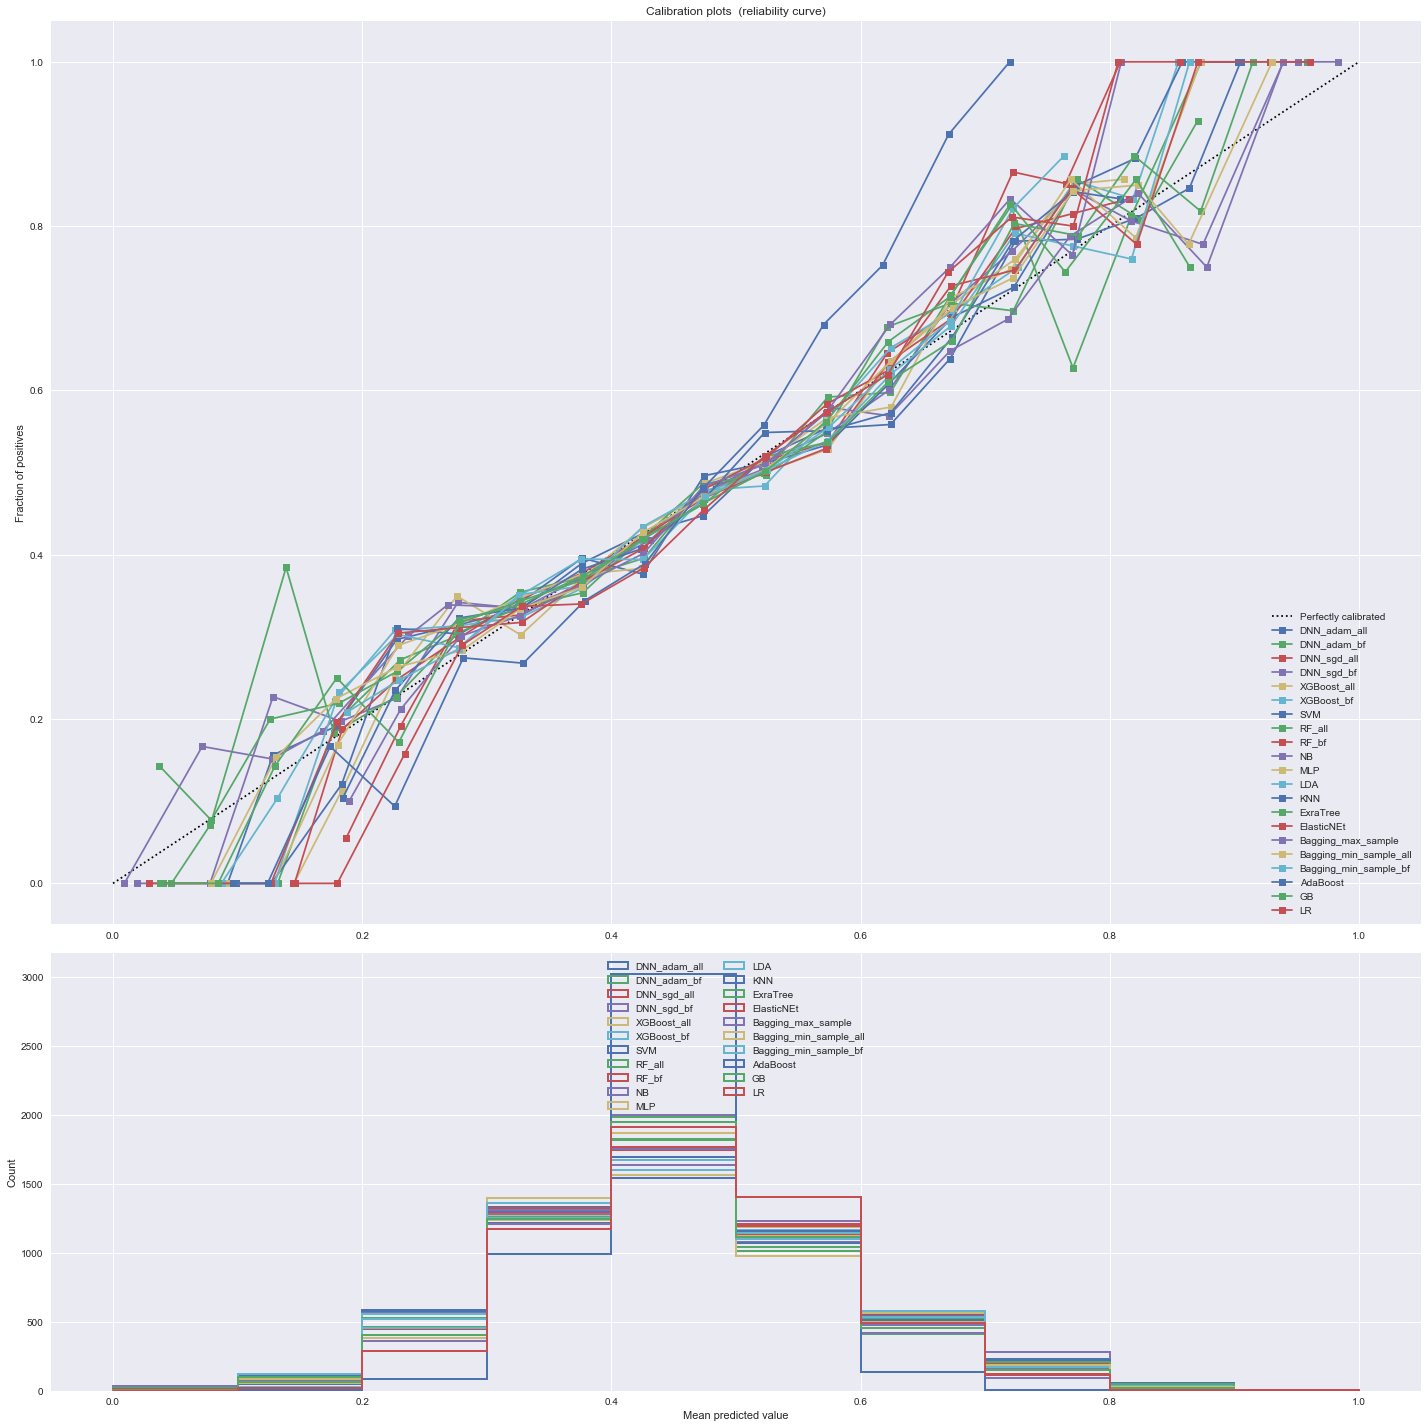

In [14]:
# Check calibration of different model of layer 1
plt.figure(figsize=(20, 20))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# Loop on all classifier
for column in X_test_layer2:
    prob_pos = X_test_layer2[column]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_df, prob_pos, n_bins=20)
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s" % (column, ))
    ax2.hist(prob_pos, range=(0, 1), bins=10, label=column,histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()